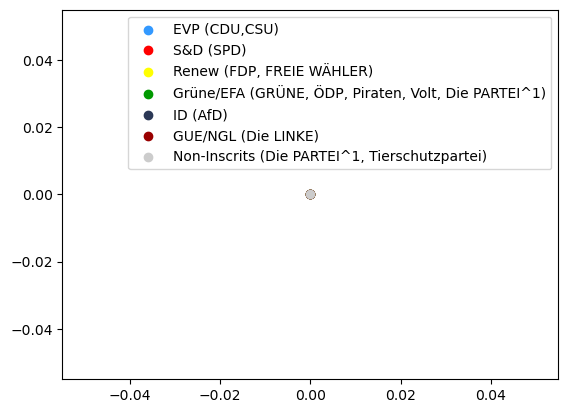

In [3]:
# LEGACY!
import parliament as P
import numpy as np

reorder_array = [8,1,2,0,11,9,6,7,4,12,10,3,13,5]

parties = [
    "CDU", # 8
    "SPD", # 1
    "GRÜNE", # 2
    "DIE LINKE", # 0
    "AfD", # 11
    "CSU", # 9
    "FDP", # 6
    "FREIE WÄHLER", # 7
    "PIRATEN", # 4
    "Tierschutzpartei", # 12
    "FAMILIE", # 10
    "ÖDP", # 3
    "Die PARTEI", # 13
    "Volt" # 5
]
# order within political spectrum
parties = np.array(parties)[np.argsort(reorder_array)]


party_colors_eu = {
    "CDU": "#3399FF",
    "SPD": "#FF0000",        
    "GRÜNE": "#009900",     
    "DIE LINKE": "#990000",  
    "AfD": "#2b3856",        
    "CSU": "#3399FF",        
    "FDP": "#FFFF00",        
    "FREIE WÄHLER": "#FFFF00", 
    "PIRATEN": "#009900",    
    "Tierschutzpartei": "#cccccc", 
    "FAMILIE": "#3399FF",    
    "ÖDP": "#009900",        
    "Die PARTEI": "#cccccc", 
    "Volt": "#009900"        
}

party_colors = {
    "CDU": "#44448a",
    "SPD": "#cc0033",        
    "GRÜNE": "#32a460",     
    "DIE LINKE": "#8f57c7",  
    "AfD": "#36cac5",        
    "CSU": "#0089c4",        
    "FDP": "#ffcc33",        
    "FREIE WÄHLER": "#8db4e3", 
    "PIRATEN": "#ff6600",    
    "Tierschutzpartei": "#92b64e", 
    "FAMILIE": "#dd1d7d",    
    "ÖDP": "#ed9f0d",        
    "Die PARTEI": "#c74933",
    "Volt": "#7f1f5f"        
}

party_colors_eu_eu_parties = {
    "EVP (CDU,CSU)": "#3399FF",
    "S&D (SPD)": "#FF0000",
    "Renew (FDP, FREIE WÄHLER)": "#FFFF00",  
    "Grüne/EFA (GRÜNE, ÖDP, Piraten, Volt, Die PARTEI^1)": "#009900",
    "ID (AfD)":"#2b3856",
    "GUE/NGL (Die LINKE)":"#990000",
    "Non-Inscrits (Die PARTEI^1, Tierschutzpartei)":"#cccccc"
}


data = np.array([
    [57.9,63.2,77.6,85.5,73.7,57.9,21.1,68.4,68.4,81.6,76.3,86.8,84.2,88.2],
    [55.3,63.2,69.7,77.6,73.7,55.3,23.7,73.7,68.4,78.9,78.9,81.6,78.9,82.9],
    [57.9,65.8,80.3,88.2,73.7,57.9,18.4,71.1,68.4,84.2,76.3,89.5,84.2,88.2],
    [56.6,69.7,76.3,84.2,72.4,56.6,19.7,69.7,64.5,75,69.7,88.2,77.6,84.2]
])

# total seats: 705
# 2024: 720

total_seats = 720
alignments = np.mean(data,axis=0)
seats = np.round((alignments / np.sum(alignments))*total_seats)

#adjust for one seat too much
after_decimal_point = ((alignments / np.sum(alignments))*total_seats)-(np.floor((alignments / np.sum(alignments))*total_seats))
after_decimal_point[after_decimal_point<0.5] = 1.
seats[np.argmin(after_decimal_point)]-=1
seats = np.array(seats)[np.argsort(reorder_array)]

# Die PARTEI split into Die PARTEI and semsrott, who joined the greens.
rearranged_seats = (seats[np.where(parties=='Die PARTEI')]/2)
seats[np.where(parties=='Die PARTEI')]-=rearranged_seats
seats[np.where(parties=='GRÜNE')]+=rearranged_seats

parties_seat_allocation = [[parties[i],int(seats[i]),party_colors_eu[parties[i]]] for i in range(len(seats))]
with open("seats_eu_colors_originalprompt_en.svg", "w", encoding="utf-8") as svg_file:
        svg_file.write(P.render_svg(parties_seat_allocation))
parties_seat_allocation = [[parties[i],int(seats[i]),party_colors[parties[i]]] for i in range(len(seats))]
with open("seats_de_colors_originalprompt_en.svg", "w", encoding="utf-8") as svg_file:
        svg_file.write(P.render_svg(parties_seat_allocation))

import matplotlib.pyplot as plt

for key in party_colors_eu_eu_parties.keys():
    plt.scatter(0,0,label=key,c=party_colors_eu_eu_parties[key])
plt.legend()
plt.savefig('legend.svg')